In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone
import pytz

%matplotlib inline

plt.style.use('fivethirtyeight')
train = pd.read_csv('repo/data/RadiationTimeSeriesPrediction/SolarPrediction.csv')

In [2]:
train.head()

,czasUNIX,Data,Czas,NatezeniePromieniowania,Temperatura,CisnieniePowietrza,WilgotnoscPowietrza,KierunekWiatru,PredkoscWiatru,WschodSlonca,ZachodSlonca
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
train.shape

(32686, 11)

In [4]:
train.columns

Index(['czasUNIX', 'Data', 'Czas', 'NatezeniePromieniowania', 'Temperatura',
       'CisnieniePowietrza', 'WilgotnoscPowietrza', 'KierunekWiatru',
       'PredkoscWiatru', 'WschodSlonca', 'ZachodSlonca'],
      dtype='object')

In [5]:
train.dtypes

czasUNIX                     int64
Data                        object
Czas                        object
NatezeniePromieniowania    float64
Temperatura                  int64
CisnieniePowietrza         float64
WilgotnoscPowietrza          int64
KierunekWiatru             float64
PredkoscWiatru             float64
WschodSlonca                object
ZachodSlonca                object
dtype: object

In [6]:
#PRZYGOTOWYWANIE DANYCH 

#Transformacja typu UNIXTime do Datetime 
#hawaii = strefa czasowa('Pacific/Honolulu')

#Tworzenie kopii oryginału
train_origial = train.copy()
df = train.copy()

train_origial.index = pd.to_datetime(df['czasUNIX'], unit='s')

train['DateTime'] = train_origial.index
train_origial['DateTime'] = train_origial.index 
train.head()

,czasUNIX,Data,Czas,NatezeniePromieniowania,Temperatura,CisnieniePowietrza,WilgotnoscPowietrza,KierunekWiatru,PredkoscWiatru,WschodSlonca,ZachodSlonca,DateTime
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-30 09:55:26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-30 09:50:23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-30 09:45:26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-30 09:40:21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-30 09:35:24


In [7]:
#Generacja DataFrame dla Natężenia Promieniowania Słonecznego, usunięcie innych zmiennych poza radiacją
train_promieniowanie = train.drop(['czasUNIX', 'Data', 'Czas', 'Temperatura',
       'CisnieniePowietrza', 'WilgotnoscPowietrza', 'KierunekWiatru',
       'PredkoscWiatru', 'WschodSlonca', 'ZachodSlonca'], axis=1)

In [8]:
#zmienne czasu
for i in (train_promieniowanie, train_origial):
    i['rok'] = i.DateTime.dt.year
    i['miesiac'] = i.DateTime.dt.month
    i['dzien'] = i.DateTime.dt.day
    i['godzina'] = i.DateTime.dt.hour

In [9]:
#USUNĄĆ
train_promieniowanie['DzienTygodnia'] = train_promieniowanie['DateTime'].dt.dayofweek
temp_rad = train_promieniowanie['DateTime']

In [10]:
#Usunąć 
#Funkcja do wyznaczania czy dany dzień tygodnia jest weekendem, niezbyt powiązane
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train_radiation['DateTime'].apply(applyer)
train_promieniowanie['Weekend'] = temp2

NameError: name 'train_radiation' is not defined

In [11]:
#zmiana indeksu dla typou danych DateTime
train_promieniowanie.index = train_promieniowanie['DateTime']
train_promieniowanie.head()

,NatezeniePromieniowania,DateTime,rok,miesiac,dzien,godzina,DzienTygodnia
DateTime,,,,,,,
2016-09-30 09:55:26,1.21,2016-09-30 09:55:26,2016,9,30,9,4
2016-09-30 09:50:23,1.21,2016-09-30 09:50:23,2016,9,30,9,4
2016-09-30 09:45:26,1.23,2016-09-30 09:45:26,2016,9,30,9,4
2016-09-30 09:40:21,1.21,2016-09-30 09:40:21,2016,9,30,9,4
2016-09-30 09:35:24,1.17,2016-09-30 09:35:24,2016,9,30,9,4


C:\Users\alicja.grochocka\AppData\Local\anaconda\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


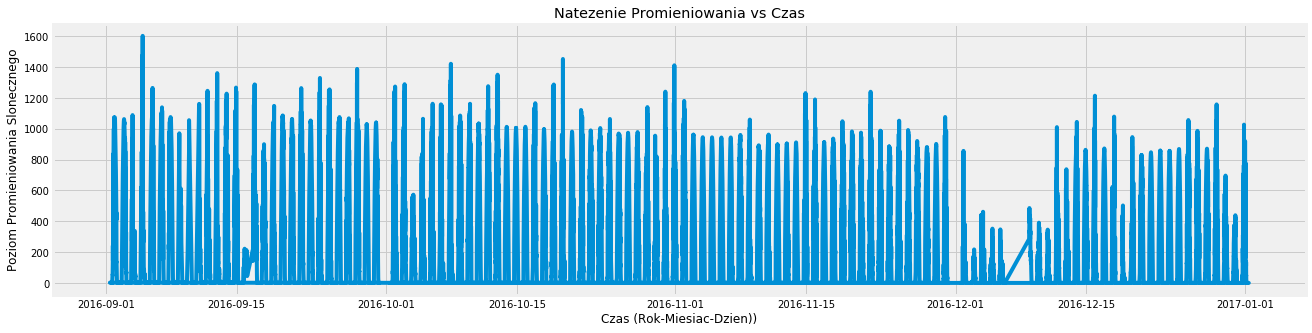

In [12]:
#Analiza Natężenia Słonecznego i wizualizacja danycb
df_rad = train_promieniowanie.drop('DateTime', 1)
ts = df_rad['NatezeniePromieniowania']
plt.figure(figsize= (20,5))
plt.title('Natezenie Promieniowania vs Czas')
plt.xlabel('Czas (Rok-Miesiac-Dzien))')
plt.ylabel('Poziom Promieniowania Slonecznego')
plt.plot(ts)

In [13]:
#Czyszczenie indeksu
train_promieniowanie['Date']=pd.to_datetime(train_promieniowanie.DateTime).dt.strftime('%Y-%m-%d')
train_promieniowanie.index = train_promieniowanie.Date
train_promieniowanie.head()

,NatezeniePromieniowania,DateTime,rok,miesiac,dzien,godzina,DzienTygodnia,Date
Date,,,,,,,,
2016-09-30,1.21,2016-09-30 09:55:26,2016,9,30,9,4,2016-09-30
2016-09-30,1.21,2016-09-30 09:50:23,2016,9,30,9,4,2016-09-30
2016-09-30,1.23,2016-09-30 09:45:26,2016,9,30,9,4,2016-09-30
2016-09-30,1.21,2016-09-30 09:40:21,2016,9,30,9,4,2016-09-30
2016-09-30,1.17,2016-09-30 09:35:24,2016,9,30,9,4,2016-09-30


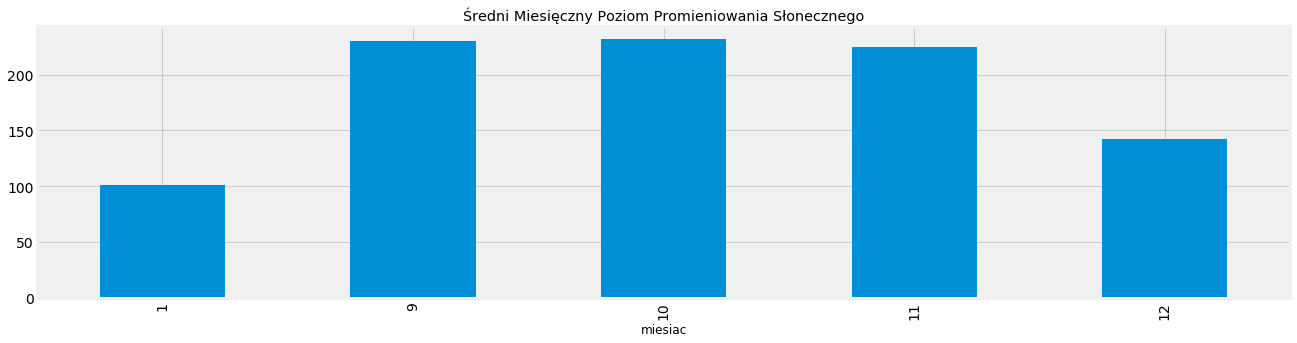

In [14]:
train_promieniowanie.groupby('miesiac')['NatezeniePromieniowania'].mean().plot.bar(figsize = (20,5),
                                                              title = 'Średni Miesięczny Poziom Promieniowania Słonecznego',
                                                              fontsize = 14)

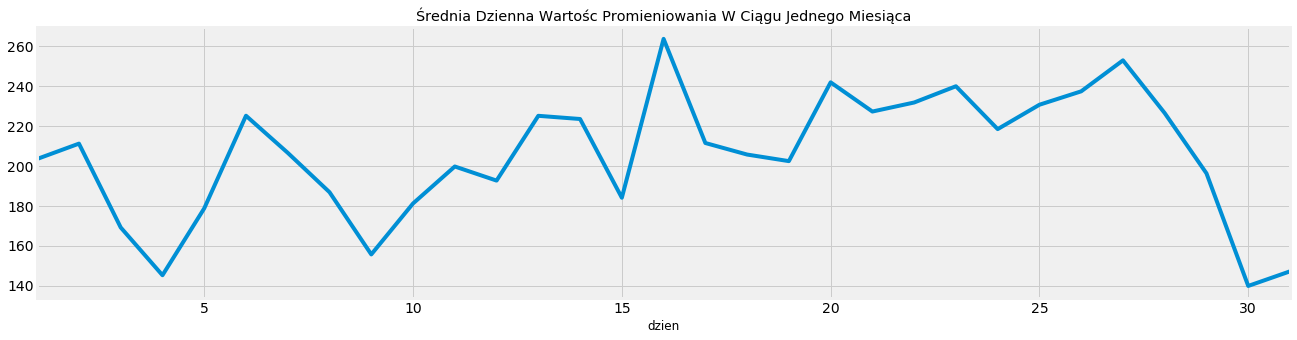

In [15]:
temp = train_promieniowanie.groupby(['dzien'])['NatezeniePromieniowania'].mean()
temp.plot(figsize = (20,5), title = "Średnia Dzienna Wartośc Promieniowania W Ciągu Jednego Miesiąca", fontsize = 14)

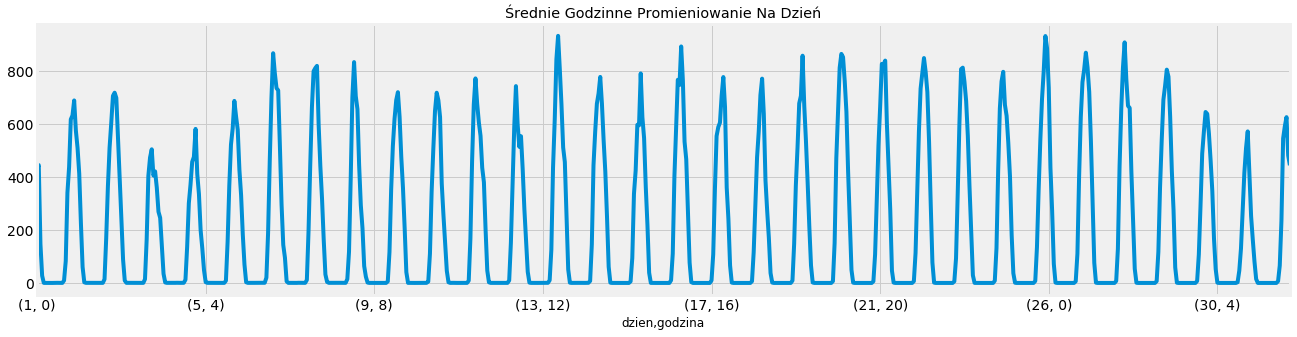

In [16]:
temp = train_promieniowanie.groupby(['dzien', 'godzina'])['NatezeniePromieniowania'].mean()
temp.plot(figsize = (20,5), title = "Średnie Godzinne Promieniowanie Na Dzień", fontsize = 14)

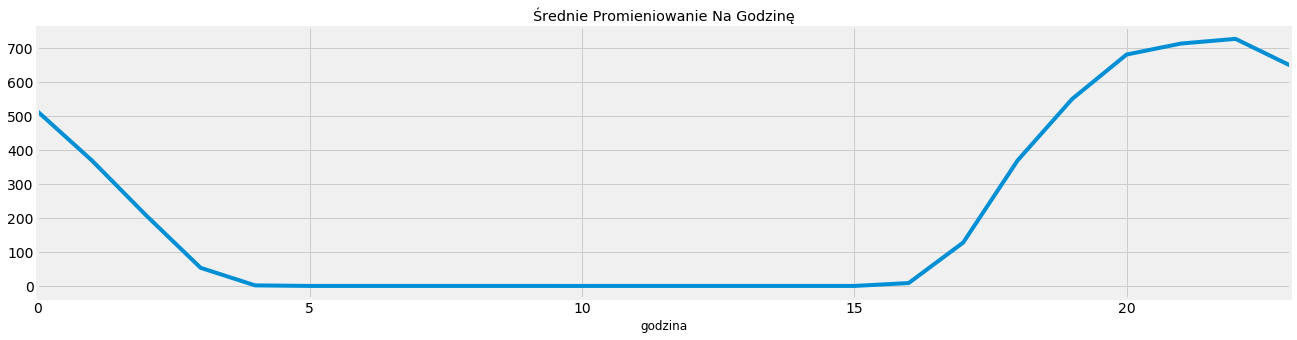

In [17]:
temp = train_promieniowanie.groupby(['godzina'])['NatezeniePromieniowania'].mean()
temp.plot(figsize = (20,5), title = "Średnie Promieniowanie Na Godzinę", fontsize = 14)

In [18]:
train_promieniowanie.groupby('Day of week')['NatezeniePromieniowania'].mean().plot.bar(figsize = (20,6),
                                                                   title = 'Średnie Natężenie Promieniowania Slonecznego każdego dnia tygodnia')

KeyError: 'Day of week'

In [19]:
#Wizualizacja z podziałem na okresy
train_promieniowanie['Zakres_Czasu'] = pd.to_datetime(train_promieniowanie.DateTime, format = '%d-%m-%y %H:%M')
train_promieniowanie.index = train_promieniowanie.Zakres_Czasu

#Godzinne
godzinne = train_promieniowanie.resample('H').mean()

#Dzienne
dzienne = train_promieniowanie.resample('D').mean()

#Tygodniowe
tygodniowe = train_promieniowanie.resample('W').mean()
    
#Miesieczne
miesieczne = train_promieniowanie.resample('M').mean()


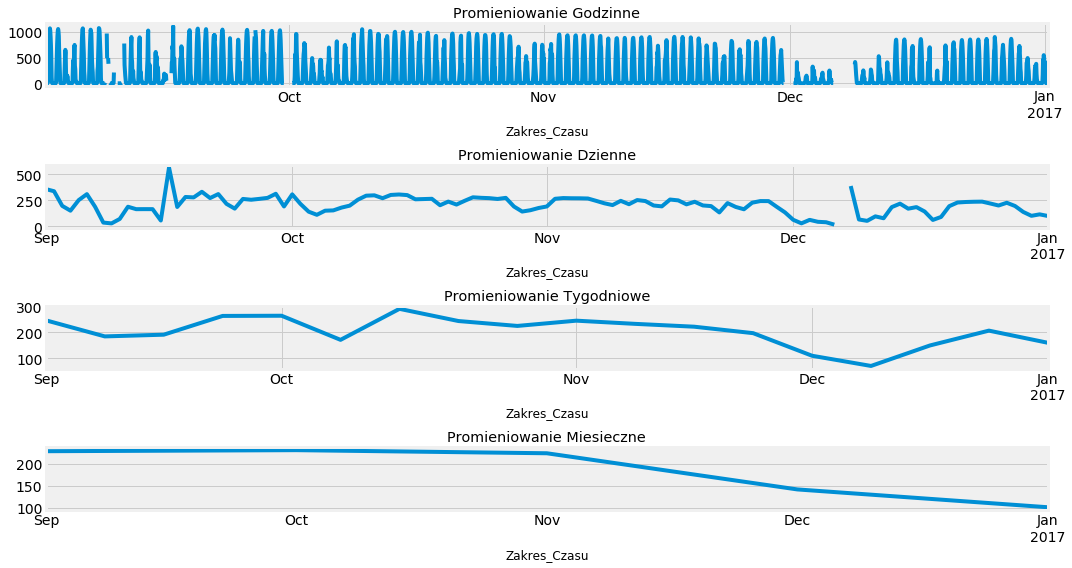

In [20]:
ig,axs = plt.subplots(4,1)

godzinne.NatezeniePromieniowania.plot(figsize = (15,8), title = "Promieniowanie Godzinne", fontsize = 14, ax = axs[0])
dzienne.NatezeniePromieniowania.plot(figsize = (15,8), title = "Promieniowanie Dzienne", fontsize = 14, ax = axs[1])
tygodniowe.NatezeniePromieniowania.plot(figsize = (15,8), title = "Promieniowanie Tygodniowe", fontsize = 14, ax = axs[2])
miesieczne.NatezeniePromieniowania.plot(figsize = (15,8), title = "Promieniowanie Miesieczne", fontsize = 14, ax = axs[3])
plt.tight_layout()

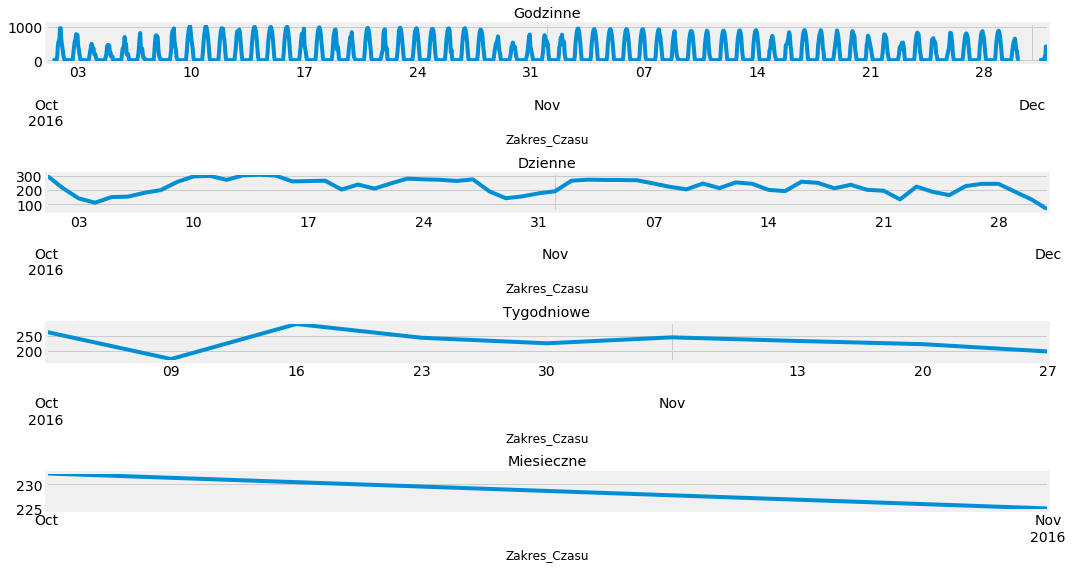

In [21]:
#Transformacja i wizualizacja regularnych danych.
#Można zauważyć, że najbardziej regularne dane pojawiają się między pażdziernikiem i początkiem grudnia. 
#Pomiędzy Grudniem a styczniem, oraz we Wrześniu nie ma wielu obserwacji, dlatego przedziały te zostały pominięte w tym kroku
From = '2016-10-01'
To   = '2016-12-01'

godzinne = godzinne.loc[From:To,:]
dzienne = dzienne.loc[From:To,:]
tygodniowe = tygodniowe.loc[From:To,:] 
miesieczne = miesieczne.loc[From:To,:] 

ig,axs = plt.subplots(4,1)
godzinne.NatezeniePromieniowania.plot(figsize = (15,8), title = "Godzinne", fontsize = 14, ax = axs[0])
dzienne.NatezeniePromieniowania.plot(figsize = (15,8), title = "Dzienne", fontsize = 14, ax = axs[1])
tygodniowe.NatezeniePromieniowania.plot(figsize = (15,8), title = "Tygodniowe", fontsize = 14, ax = axs[2])
miesieczne.NatezeniePromieniowania.plot(figsize = (15,8), title = "Miesieczne", fontsize = 14, ax = axs[3])
plt.tight_layout()

In [22]:
#Test stacjonarnmosci danych
from statsmodels.tsa.stattools import adfuller

def test_stacjonarnosci(df, ts):
    # Określenie statystyk kroczących
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot statystyk kroczących
    orig = plt.plot(df[ts], color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red' , label = 'Srednia')
    std = plt.plot(rolstd, color = 'black', label ='Odchylenie standardowe')
    
    plt.legend(loc = 'best')
    plt.title('Średnia i odchylenie standardowe %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index = ['Test statystyczny',
                                  'wartość p',
                                  'liczba użytych opóźnień',
                                  'Liczba użytych obserwacji'])
    for key, value in dftest[4].items():
        dfoutput['Wartość Krytyczna (%s)' %key] = value
    print(dfoutput)

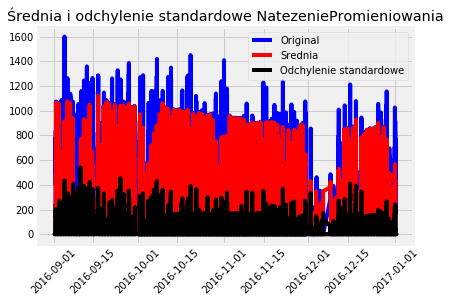

Results of Dickey-Fuller Test:
Test statystyczny              -23.773759
wartość p                        0.000000
liczba użytych opóźnień         45.000000
Liczba użytych obserwacji    32640.000000
Wartość Krytyczna (1%)          -3.430550
Wartość Krytyczna (5%)          -2.861629
Wartość Krytyczna (10%)         -2.566817
dtype: float64


In [23]:
test_stacjonarnosci(df = train_promieniowanie, ts = 'NatezeniePromieniowania')

In [24]:
#Hypothesis

#What does the Dickey-Fuller Test tell us?

#This is one of the statistical tests to verify the stationarity. Here the null hypothesis is that the time series is not stationary. The results of the tests include a test statistic (test statistic) and some critical values for the difference confidence levels. If the "Test Statistic" is smaller than the "Critical Value 1%", the null hypothesis is rejected, therefore the series is stationary.

#In summary,

#Critical-Value = cv = -3.43 | Test Statistic = ts = -23.77

#H0: It is not stationary; ts> cv
#H1: It is stationary; ts <cv
#Therefore, H0 is rejected, which indicates that the series is stationary .   
#Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [25]:
#Predictions
#Imports libraries

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [27]:
#podział danych na  zbiór uczący i walidacyjny
_train = godzinne.loc['2016-10-02':'2016-11-13',:]
walidacja = godzinne.loc['2016-11-14': '2016-11-28',:]


In [44]:
walidacja.shape

(360, 6)

In [28]:
_train.head()

,NatezeniePromieniowania,rok,miesiac,dzien,godzina,DzienTygodnia
Zakres_Czasu,,,,,,
2016-10-02 00:00:00,459.665000,2016.0,10.0,2.0,0.0,6.0
2016-10-02 01:00:00,305.445000,2016.0,10.0,2.0,1.0,6.0
2016-10-02 02:00:00,149.431667,2016.0,10.0,2.0,2.0,6.0
2016-10-02 03:00:00,54.668333,2016.0,10.0,2.0,3.0,6.0
2016-10-02 04:00:00,2.310833,2016.0,10.0,2.0,4.0,6.0


In [29]:
walidacja.head()

,NatezeniePromieniowania,rok,miesiac,dzien,godzina,DzienTygodnia
Zakres_Czasu,,,,,,
2016-11-14 00:00:00,706.186667,2016.0,11.0,14.0,0.0,0.0
2016-11-14 01:00:00,513.421667,2016.0,11.0,14.0,1.0,0.0
2016-11-14 02:00:00,269.996667,2016.0,11.0,14.0,2.0,0.0
2016-11-14 03:00:00,36.060000,2016.0,11.0,14.0,3.0,0.0
2016-11-14 04:00:00,1.212500,2016.0,11.0,14.0,4.0,0.0


NameError: name 'valid' is not defined

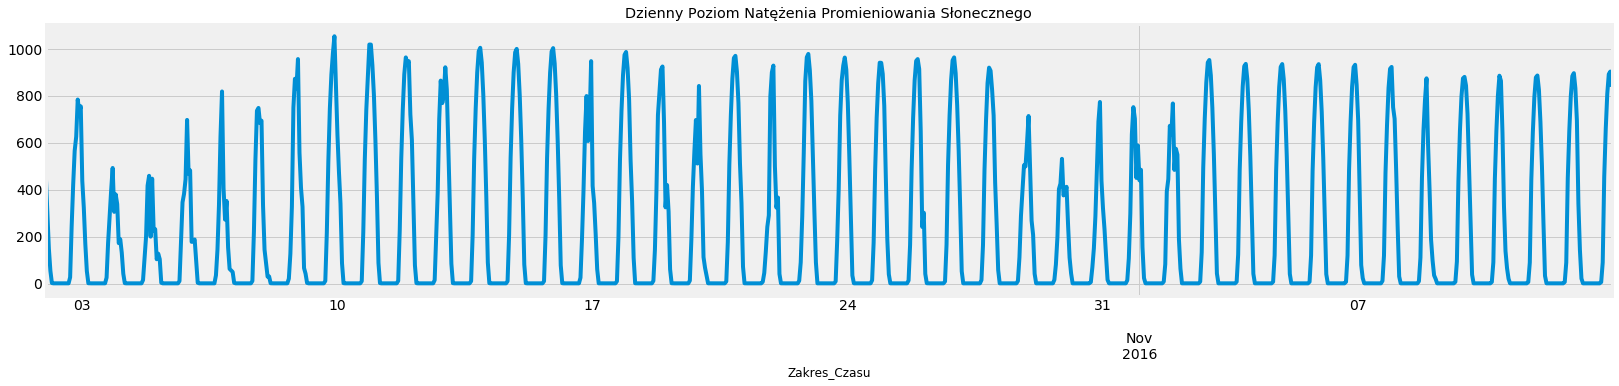

In [30]:
_train.NatezeniePromieniowania.plot(figsize=(25,5), title =  'Dzienny Poziom Natężenia Promieniowania Słonecznego', fontsize=14, label='Train')
valid.NatezeniePromieniowania.plot(figsize=(25,5), title = 'Dzienny Poziom Natężenia Promieniowania Słonecznego', fontsize=14, label='Valid')
plt.xlabel('Przedział Czasu')
plt.ylabel('Natezenie Promieniowania')
plt.legend(loc = 'best')

<Figure size 1600x800 with 0 Axes>

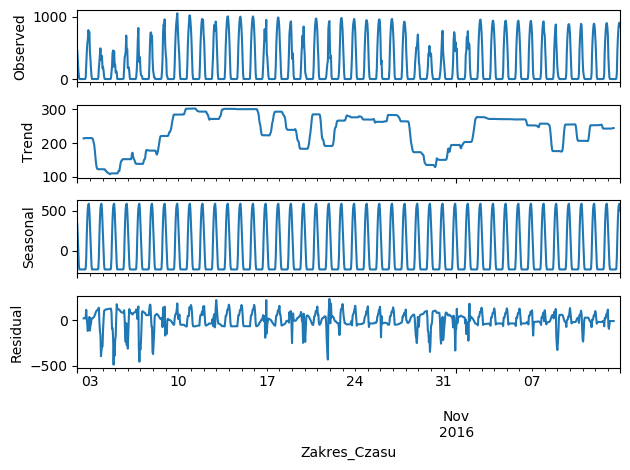

In [31]:
#Rozkład według sezonowości
plt.style.use('default')
plt.figure(figsize = (16,8))
sm.tsa.seasonal_decompose(_train.NatezeniePromieniowania).plot()
result = sm.tsa.stattools.adfuller(_train.NatezeniePromieniowania)
plt.show()

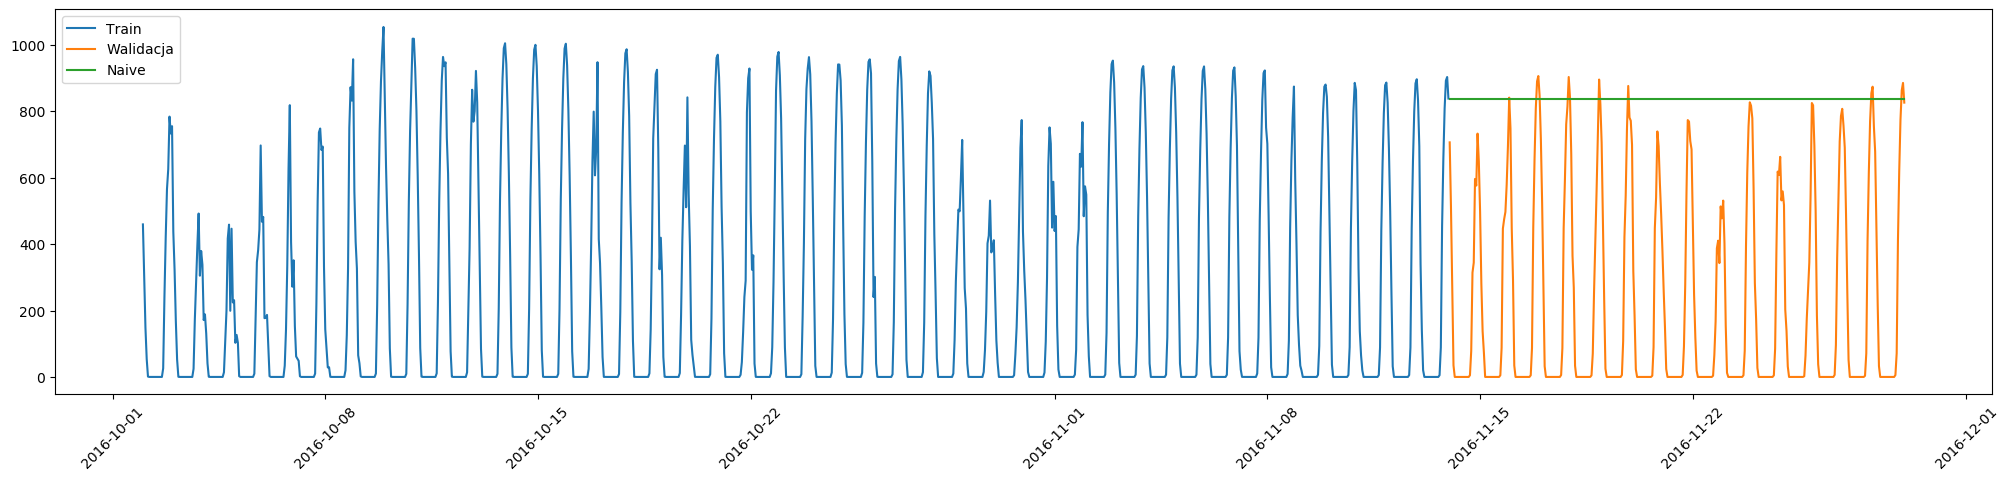

In [32]:
#Naive Approach
dd = np.asarray(_train.NatezeniePromieniowania)
y_hat =walidacja.copy()
y_hat['naive'] = dd[len(dd)- 1]
plt.figure(figsize = (25,5))
plt.plot(_train.index, _train['NatezeniePromieniowania'],label = 'Train')
plt.plot(walidacja.index, walidacja['NatezeniePromieniowania'], label = 'Walidacja')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.tick_params(axis = 'x', rotation = 45)


In [33]:
#Error RMS for Naive Approach
rmse = sqrt(mean_squared_error(valid['NatezeniePromieniowania'], y_hat['naive']))
rmse


NameError: name 'valid' is not defined

In [34]:
def plot_acf_pacf(df, ts):
  """
  Rysowanie funkcji autokorelacji ACF i częściowje autokorelacji PACF
  """
  f, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 5)) 

  #Rysowanie ACF: 

  ax1.plot(lag_acf)
  ax1.axhline(y=0,linestyle='--',color='gray')
  ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.set_title('Funkcja autokorelacji dla %s' %(ts))

  #Rysowanie PACF:
  ax2.plot(lag_pacf)
  ax2.axhline(y=0,linestyle='--',color='gray')
  ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.set_title('Funkcja częściowej autokorelacji dla %s' %(ts))
  
  plt.tight_layout()
  plt.show()
  plt.close()
  
  return

C:\Users\alicja.grochocka\AppData\Local\anaconda\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


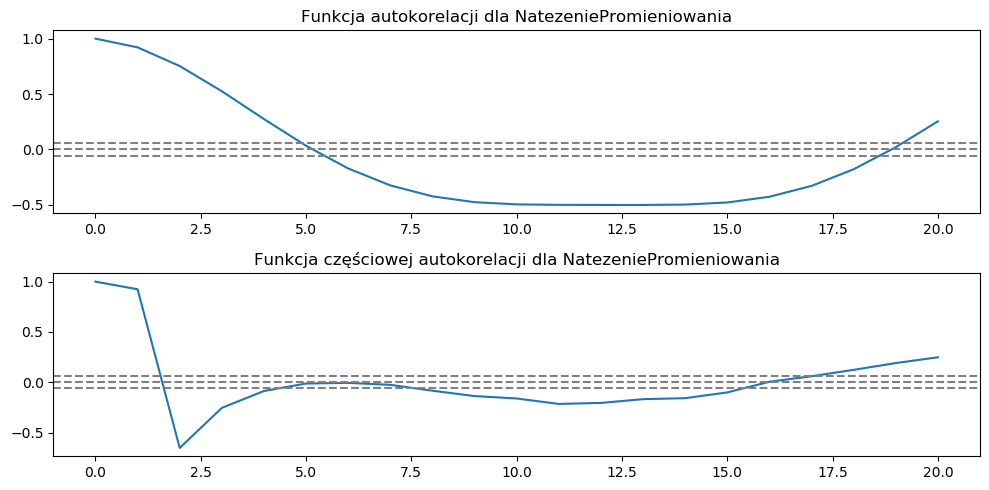

In [35]:
lag_acf = acf(np.array(_train['NatezeniePromieniowania']), nlags = 20)
lag_pacf = pacf(np.array(_train['NatezeniePromieniowania']), nlags = 20, method='ols')

plot_acf_pacf(df = _train, ts = 'NatezeniePromieniowania')


In [36]:
#SARIMAX(1,0,1)

In [37]:
fit2 = sm.tsa.statespace.SARIMAX(_train.NatezeniePromieniowania, order=(1,0,1),seasonal_order=(1,1,0,12), trend='ct')
res = fit2.fit()
y_hat_avg['SARIMA'] = res.predict(start="2016-11-14", end="2016-11-29", dynamic=True)
plt.figure(figsize=(20,5))
plt.plot( _train['NatezeniePromieniowania'], label='Train')
plt.plot(walidacja['NatezeniePromieniowania'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')

C:\Users\alicja.grochocka\AppData\Local\anaconda\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NameError: name 'y_hat_avg' is not defined

In [ ]:
res.summary()

In [41]:
rms = sqrt(mean_squared_error(walidacja.NatezeniePromieniowania, y_hat_avg['SARIMA']))
print('Error:', rms)

NameError: name 'y_hat_avg' is not defined

In [42]:
#ARIMA(1,0,1)
model = ARIMA(_train.NatezeniePromieniowania, order=(1, 0, 1))  
results_MA = model.fit()  
plt.plot(_train.Radiation)
plt.plot(results_MA.fittedvalues, color='red')

AttributeError: 'DataFrame' object has no attribute 'Radiation'

In [40]:
results_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                
===================================================================================
Dep. Variable:     NatezeniePromieniowania   No. Observations:                 1032
Model:                          ARMA(1, 1)   Log Likelihood               -6291.946
Method:                            css-mle   S.D. of innovations            107.417
Date:                     Fri, 10 Jan 2020   AIC                          12591.892
Time:                             14:14:19   BIC                          12611.649
Sample:                         10-02-2016   HQIC                         12599.390
                              - 11-13-2016                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           239.8119     41.564      5.770      0.000     158.348     321.276
ar.L1.NatezeniePromieniowania     0.8826      0.015     58.571      0.000       0.853       0.912
ma.L1.NatezeniePromieniowania     0.4695      0.023     20.587      0.000       0.425       0.514
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1330           +0.0000j            1.1330            0.0000
MA.1           -2.1299           +0.0000j            2.1299            0.5000
-----------------------------------------------------------------------------
"""

In [179]:
rms = sqrt(mean_squared_error(walidacja.NatezeniePromieniowania, y_hat_avg['SARIMA']))
print('Error:', rms)

Error: 174.0750782246448


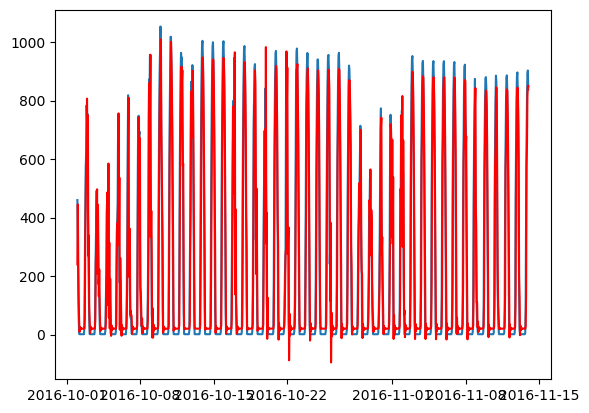

In [180]:
#ARIMA(1,0,1)
model = ARIMA(_train.NatezeniePromieniowania, order=(1, 0, 1))  
results_MA = model.fit()  
plt.plot(_train.NatezeniePromieniowania)
plt.plot(results_MA.fittedvalues, color='red')

In [181]:
results_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                
===================================================================================
Dep. Variable:     NatezeniePromieniowania   No. Observations:                 1032
Model:                          ARMA(1, 1)   Log Likelihood               -6291.946
Method:                            css-mle   S.D. of innovations            107.417
Date:                     Wed, 08 Jan 2020   AIC                          12591.892
Time:                             17:47:05   BIC                          12611.649
Sample:                         10-02-2016   HQIC                         12599.390
                              - 11-13-2016                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           239.8119     41.564      5.770      0.000     158.348     321.276
ar.L1.NatezeniePromieniowania     0.8826      0.015     58.571      0.000       0.853       0.912
ma.L1.NatezeniePromieniowania     0.4695      0.023     20.587      0.000       0.425       0.514
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1330           +0.0000j            1.1330            0.0000
MA.1           -2.1299           +0.0000j            2.1299            0.5000
-----------------------------------------------------------------------------
"""